20


<Figure size 1200x800 with 0 Axes>

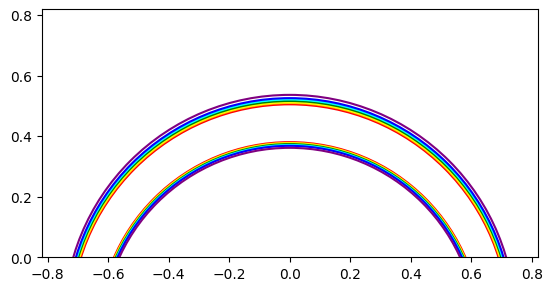

In [1]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 8))
r = 1 #arbitrary
alpha = np.deg2rad(int(input()))

def convert(frequency, color_name):
    n = (1 + ((1 / (1.731 - 0.261*((frequency / 1000)**2))) ** 0.5)) ** 0.5
    Theta1 = np.arcsin(((9-n**2)/8)**0.5)
    Theta2 = np.arcsin(((4-n**2)/3)**0.5)
    Epsilon1 = np.pi - 6*np.arcsin(np.sin(Theta1) / n) + 2*Theta1
    Epsilon2 = 4*np.arcsin(np.sin(Theta2) / n) - 2*Theta2
    Radius1 = r*np.sin(Epsilon1)*np.cos(alpha)
    Radius2 = r*np.sin(Epsilon2)*np.cos(alpha)
    Center1 = Radius1 - r*np.sin(Epsilon1 - alpha)
    Center2 = Radius2 - r*np.sin(Epsilon2 - alpha)
    return {
        'Center1': Center1,
        'Center2': Center2,
        'Radius1': Radius1,
        'Radius2': Radius2,
        'color': color_name,
        'frequency': f"{frequency} THz"
    }

colors = {
    'Red': convert(442.5, 'red'),
    'Orange': convert(495, 'orange'),
    'Yellow': convert(520, 'yellow'),
    'Green': convert(565, 'green'),
    'Cyan': convert(610, 'cyan'),
    'Blue': convert(650, 'blue'),
    'Violet': convert(735, 'purple')
}

figure, axes = plt.subplots()
max_radius = max(max(data['Radius1'], data['Radius2']) for data in colors.values())
plot_limit = max_radius * 1.1

for name, data in colors.items():
    Circle1 = plt.Circle((0, -1*data['Center1']), data['Radius1'], color=data['color'], linewidth=1.5, fill = False)
    Circle2 = plt.Circle((0, -1*data['Center2']), data['Radius2'], color=data['color'], linewidth=1.5, fill = False)
    axes.set_aspect(1)
    axes.add_artist(Circle1)
    axes.add_artist(Circle2)

plt.xlim(-plot_limit, plot_limit)
plt.ylim(0, plot_limit)
plt.show()
